In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names= ['Exam1','Exam2','Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


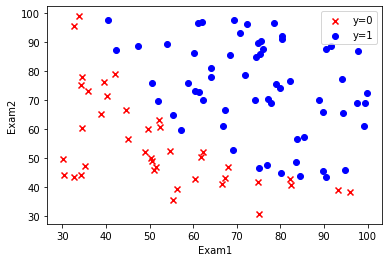

In [30]:
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel='Exam1',ylabel='Exam2')
plt.show()

In [31]:
def get_Xy(data):
    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values

    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)

    return X,y

In [32]:
X,y = get_Xy(data)
X.shape

(100, 3)

In [33]:
y.shape

(100, 1)

In [34]:
# 损失函数

In [35]:
def sigmiod(z):
    return 1/(1+np.exp(-z))

In [36]:
def costFunction(X,y,theta):
    A = sigmiod(X@theta)
    first = y*np.log(A)
    second = (1-y)*np.log(1-A)
    return -np.sum(first + second)/len(X)

In [37]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [38]:
cost_init=costFunction(X,y,theta)
cost_init

0.6931471805599453

In [47]:
def gradientDescent(X,y,theta,iters,alpha):
    m = len(X)
    costs = []

    for i in range(iters):
        A = sigmiod(X@theta)
        theta = theta-(alpha/m)*X.T@(A-y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        if i% 1000 ==0:
            print(cost)
    return costs,theta

In [56]:
alpha = 0.004
iters = 200000

In [57]:

costs,theta_final = gradientDescent(X,y,theta,iters,alpha)

1.9886538578930086
3.078170019864155
5.487009635362496
1.851943366133263
2.955128942408359
5.438688730769618
1.8046128090728515
2.8312715776074038
5.3886531633606145
1.7561538117121538
2.706676380747811
5.3365673644957425
1.706280704769481
2.5818508519054273
5.281774101800353
1.6544129958512053
2.457843094743578
5.223255119969365
1.599661209714555
2.3362477519414626
5.159653459570274
1.5408871901849066
2.2190492038468905
5.089387088751128
1.4768567851081462
2.1082685090536497
5.010845104587983
1.406449363280585
2.0054338903832694
4.9225734611717336
1.3288041261254446
1.910964605489366
4.823257484826611
1.2432202250971687
1.823586612152141
4.711246821296763
1.1486277932139555
1.7397667362447995
4.583257400457349
1.0423478306006695
1.6525865746034032
4.430932868329269
0.9166267386002187
1.546533127655085
4.224624720512681
0.7330944584991134
4.193748767678607
3.8728007824436643
1.1436004419410515
0.6494926269781051
0.6083915816023645
0.27160267617962286
1.0930701723826168
0.33557661375589

In [58]:
# 展示决策边界

In [62]:
theta_final

array([[-23.77367654],
       [  0.18688257],
       [  0.1804292 ]])

In [65]:
def predict(X,theta):
    prob = sigmiod(X@theta)
    return [1 if x >=0.5 else 0 for x in prob]

In [71]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc = np.mean(y_pre==y)
print(acc)

0.86


In [72]:
coef1 = -theta_final[0,0]/theta_final[2,0]
coef2 = -theta_final[1,0]/theta_final[2,0]

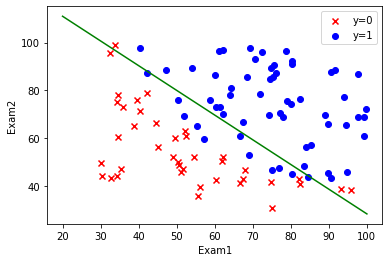

In [75]:
x = np.linspace(20,100,100)
f = coef1 + coef2 * x

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel='Exam1',ylabel='Exam2')

ax.plot(x,f,c='g')
plt.show()